In [ ]:
import pandas as pd


model_code = "Cascade" 
model_path= "/home/fakrul/Model_Mozilla_CommonDataSet/"+model_code+"/bo_6_5_4_3_output_graph.pb"
master_data_path = '/home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/'
inference_data_path= '/home/fakrul/Model_Mozilla_CommonDataSet/'+ str(model_code)+'_inference.csv'
#10% sample
inference_size=0.10

test_data_path = master_data_path+ "test.csv"
#test_data_path = master_data_path+ "train.csv"
print('Test Data Path: ',test_data_path)

dev_data_path = master_data_path+ "dev.csv"
print('Dev Data Path: ',dev_data_path)

print('model_path: ', model_path)
print('model_code: ', model_code)
print('inference_data_path: ', inference_data_path)
print('inference sample size:', inference_size*100, "%")


Test Data Path:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/test.csv
Dev Data Path:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/dev.csv
model_path:  /home/fakrul/Model_Mozilla_CommonDataSet/Cascade/bo_6_5_4_3_output_graph.pb
model_code:  Cascade
inference_data_path:  /home/fakrul/Model_Mozilla_CommonDataSet/Cascade_inference.csv
inference sample size: 10.0 %


In [ ]:
test_data = pd.read_csv(test_data_path)
print('Test Data Loaded')

Test Data Loaded


In [ ]:
new = test_data['wav_filename'].copy() 
test_data["wav_filename"]= str(master_data_path)+new
test_data["wav_filename"]
#test_data.to_csv("/home/fakrul/Model_Mozilla_CommonDataSet"+"/test_inference.csv", index=False)
print(test_data.count())
print(test_data.head(2))

wav_filename    1629
wav_filesize    1629
transcript      1629
dtype: int64
                                        wav_filename  wav_filesize  \
0  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        135212   
1  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        141356   

                                transcript  
0             waarom belde je me niet even  
1  bert anciaux zit al lang in de politiek  


In [ ]:
dev_data=pd.read_csv(dev_data_path)
print('Dev Data Loaded')

Dev Data Loaded


In [ ]:
new = dev_data['wav_filename'].copy() 
#new
dev_data["wav_filename"]= str(master_data_path)+new
dev_data["wav_filename"]
#dev_data.to_csv("/home/fakrul/Model_Mozilla_CommonDataSet"+"/dev_inference.csv", index=False)
print(dev_data.count())
print(dev_data.head(2))

wav_filename    1625
wav_filesize    1625
transcript      1625
dtype: int64
                                        wav_filename  wav_filesize  \
0  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        149804   
1  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...         88364   

                                    transcript  
0  platanen staan bekend om hun grote bladeren  
1                   hij maakt alles te complex  


In [ ]:
df_test_dev = pd.concat([test_data, dev_data ])
print('Done DF_Test_Dev')

Done DF_Test_Dev


In [ ]:
print(df_test_dev)

                                           wav_filename  wav_filesize  \
0     /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        135212   
1     /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        141356   
2     /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        142124   
3     /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        272684   
4     /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        107564   
...                                                 ...           ...   
1620  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        140588   
1621  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        119084   
1622  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        126764   
1623  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        249644   
1624  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        215084   

                                             transcript  
0                          waarom belde je me niet even  
1      

In [ ]:
from sklearn.model_selection import train_test_split

trainingSet, inferenceSet = train_test_split(df_test_dev, test_size=inference_size, random_state=500)

In [ ]:
print(inferenceSet.head())
print(inferenceSet.count())

                                           wav_filename  wav_filesize  \
1010  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        111404   
1322  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...         92204   
337   /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...        183596   
46    /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...         76844   
1229  /home/fakrul/Model_Mozilla_CommonDataSet/nl/cl...         57644   

                                           transcript  
1010         in de klas kon ik mij nooit concentreren  
1322                hij heeft ooit een moord gepleegd  
337   ik heb boterhammen met boter en kaas meegenomen  
46                        het kanaal was dichtgeslibd  
1229                               ik kom er aan baas  
wav_filename    326
wav_filesize    326
transcript      326
dtype: int64


In [ ]:
inferenceSet.to_csv(inference_data_path, index=False)

In [ ]:
#final_clips=path+str(batch_size)

#os.mkdir(final_clips)

#_rest_trainingSet.to_csv(final_clips+"/train.csv", index=False)
#_rest_testingSet.to_csv(final_clips+"/test.csv", index=False)
#_rest_validatingSet.to_csv(final_clips+"/dev.csv", index=False)

#_rest_trainingSet.to_csv(final_clips+"/training_"+str(batch_size)+".csv", index=False)
#_rest_testingSet.to_csv(final_clips+"/testing_"+str(batch_size)+".csv", index=False)
#_rest_validatingSet.to_csv(final_clips+"/validating_"+str(batch_size)+".csv", index=False)

#print('Reamainder final clip directory created and csv files copied')

In [ ]:
from __future__ import absolute_import, division, print_function

import argparse
import numpy as np
import shlex
import subprocess
import sys
import wave
import json
import textdistance

from deepspeech import Model, version
from timeit import default_timer as timer

In [ ]:
try:
    from shhlex import quote
except ImportError:
    from pipes import quote

In [ ]:
def convert_samplerate(audio_path, desired_sample_rate):
    sox_cmd = 'sox {} --type raw --bits 16 --channels 1 --rate {} --encoding signed-integer --endian little --compression 0.0 --no-dither - '.format(quote(audio_path), desired_sample_rate)
    try:
        output = subprocess.check_output(shlex.split(sox_cmd), stderr=subprocess.PIPE)
    except subprocess.CalledProcessError as e:
        raise RuntimeError('SoX returned non-zero status: {}'.format(e.stderr))
    except OSError as e:
        raise OSError(e.errno, 'SoX not found, use {}hz files or install it: {}'.format(desired_sample_rate, e.strerror))

    return desired_sample_rate, np.frombuffer(output, np.int16)

In [ ]:
def metadata_to_string(metadata):
    return ''.join(token.text for token in metadata.tokens)

In [ ]:
def words_from_candidate_transcript(metadata):
    word = ""
    word_list = []
    word_start_time = 0
    # Loop through each character
    for i, token in enumerate(metadata.tokens):
        # Append character to word if it's not a space
        if token.text != " ":
            if len(word) == 0:
                # Log the start time of the new word
                word_start_time = token.start_time

            word = word + token.text
        # Word boundary is either a space or the last character in the array
        if token.text == " " or i == len(metadata.tokens) - 1:
            word_duration = token.start_time - word_start_time

            if word_duration < 0:
                word_duration = 0

            each_word = dict()
            each_word["word"] = word
            each_word["start_time "] = round(word_start_time, 4)
            each_word["duration"] = round(word_duration, 4)

            word_list.append(each_word)
            # Reset
            word = ""
            word_start_time = 0

    return word_list

In [ ]:
def metadata_json_output(metadata):
    json_result = dict()
    json_result["transcripts"] = [{
        "confidence": transcript.confidence,
        "words": words_from_candidate_transcript(transcript),
    } for transcript in metadata.transcripts]
    return json.dumps(json_result, indent=2)

In [ ]:
class VersionAction(argparse.Action):
    def __init__(self, *args, **kwargs):
        super(VersionAction, self).__init__(nargs=0, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        print('DeepSpeech ', version())
        exit(0)

In [ ]:
def do_bulkinference(args_model, args_infer_data, testList, inferencetime, audiolength):
    
    inf_configuration = {} 
    
    inf_configuration['args.model'] = args_model
    #inf_configuration['args.audio'] = args_audio
    inf_configuration['args.candidate_transcripts'] = 10000
    #inf_configuration['args.scorer'] = 'None'
    inf_configuration['args.scorer'] = 0
    #inf_configuration['args.beam_width'] = 'None'
    inf_configuration['args.beam_width'] = 0
    #inf_configuration['args.lm_alpha'] = 'None'
    inf_configuration['args.lm_alpha'] = 0
    #inf_configuration['args.lm_beta'] = 'None'
    inf_configuration['args.lm_beta'] = 0
    #inf_configuration['args.version'] = 'None'
    inf_configuration['args.version'] = 0
    inf_configuration['args.extended'] = False
    inf_configuration['args.json'] = False
    
    #args.model:  /home/fakrul/Model_Mozilla_CommonDataSet/FineTune1/output_graph.pbmm
    #args.scorer:  None
    #args.audio:  /home/fakrul/Model_Mozilla_CommonDataSet/audio_dutch/krates_04_maurik_64kb_1762740.wav
    #args.beam_width:  None
    #args.lm_alpha:  None
    #args.lm_beta:  None
    #args.version:  None
    #args.extended:  False
    #args.json:  False
    #args.candidate_transcripts:  3
    
    #print(inf_configuration["args.model"])
    #print(inf_configuration["args.audio"])
    #print(inf_configuration)
    
    
    print('Loading model from file {}'.format(inf_configuration['args.model']), file=sys.stderr)
    model_load_start = timer()
    # sphinx-doc: python_ref_model_start
    ds = Model(inf_configuration['args.model'])
    # sphinx-doc: python_ref_model_stop
    model_load_end = timer() - model_load_start
    print('Loaded model in {:.3}s.'.format(model_load_end), file=sys.stderr)

    if inf_configuration['args.beam_width']:
        ds.setBeamWidth(inf_configuration['args.beam_width'])

    desired_sample_rate = ds.sampleRate()

    if inf_configuration['args.scorer']:
        print('Loading scorer from files {}'.format(inf_configuration['args.scorer']), file=sys.stderr)
        scorer_load_start = timer()
        ds.enableExternalScorer(inf_configuration['args.scorer'])
        scorer_load_end = timer() - scorer_load_start
        print('Loaded scorer in {:.3}s.'.format(scorer_load_end), file=sys.stderr)

        if inf_configuration['args.lm_alpha'] and inf_configuration['args.lm_beta']:
            ds.setScorerAlphaBeta(inf_configuration['args.lm_alpha'], inf_configuration['args.lm_beta'])
    
    #LoadInference Data
    for ind in args_infer_data.index:
        #inf_configuration['args.audio']=""       
        #args_infer_data['wav_filename']=""
        inf_configuration['args.audio']=args_infer_data['wav_filename'][ind]
        actual_transcript= args_infer_data['transcript'][ind]
        
        print('Infer Wavefile: ',  inf_configuration['args.audio'])
        #print('Infer Transcript:', actual_transcript)
        
        fin = wave.open(inf_configuration['args.audio'], 'rb')
        fs_orig = fin.getframerate()
        if fs_orig != desired_sample_rate:
            print('Warning: original sample rate ({}) is different than {}hz. Resampling might produce erratic speech recognition.'.format(fs_orig, desired_sample_rate), file=sys.stderr)
            fs_new, audio = convert_samplerate(inf_configuration['args.audio'], desired_sample_rate)
        else:
            audio = np.frombuffer(fin.readframes(fin.getnframes()), np.int16)
        
        audio_length = fin.getnframes() * (1/fs_orig)
        fin.close()
        
        print('Running inference.', file=sys.stderr)
        inference_start = timer()
        if inf_configuration['args.extended']:
            print(metadata_to_string(ds.sttWithMetadata(audio, 1).transcripts[0]))
        elif inf_configuration['args.json']:
            print("args.json")
            print(metadata_json_output(ds.sttWithMetadata(audio, inf_configuration['args.candidate_transcripts'])))
        else:
            inference_text=ds.stt(audio)
            testList.append(textdistance.hamming.distance(inference_text, actual_transcript)) 
            print("inference_transcription :",inference_text)
            print("real_transcription :",actual_transcript)
            #print("textdistance.Hamming.distance :",textdistance.hamming.distance(inference_text, actual_transcript))
            #print("Own Function, Hamming distance :",hamming_distance(inference_text, actual_transcript))
            #print("textdistance.hamming.normalized_distance :",textdistance.hamming.normalized_distance(inference_text, actual_transcript))
            #print("textdistance.hamming.normalized_similarity :",textdistance.hamming.normalized_similarity(inference_text, actual_transcript))
            #print("textdistance.hamming.similarity :",textdistance.hamming.similarity('inference_text', 'actual_transcript'))
            
        inference_end = timer() - inference_start
        inferencetime.append(round(inference_end,3))
        audiolength.append(round(audio_length,3))
        #print('Inference took %0.3fs for %0.3fs audio file.' % (inference_end, audio_length), file=sys.stderr)
        #print('Next One\n')
        
    return testList,inferencetime,audiolength

    #fin = wave.open(inf_configuration['args.audio'], 'rb')
    #fs_orig = fin.getframerate()
    #if fs_orig != desired_sample_rate:
    #    print('Warning: original sample rate ({}) is different than {}hz. Resampling might produce erratic speech recognition.'.format(fs_orig, desired_sample_rate), file=sys.stderr)
    #    fs_new, audio = convert_samplerate(inf_configuration['args.audio'], desired_sample_rate)
    #else:
    #    audio = np.frombuffer(fin.readframes(fin.getnframes()), np.int16)

    #audio_length = fin.getnframes() * (1/fs_orig)
    #fin.close()

    #print('Running inference.', file=sys.stderr)
    #inference_start = timer()
    # sphinx-doc: python_ref_inference_start
    #if inf_configuration['args.extended']:
        #print("args.extended")
    #    print(metadata_to_string(ds.sttWithMetadata(audio, 1).transcripts[0]))
    #elif inf_configuration['args.json']:
    #    print("args.json")
    #    print(metadata_json_output(ds.sttWithMetadata(audio, inf_configuration['args.candidate_transcripts'])))
    #else:
        #print("else")
    #    inference_text=ds.stt(audio)
        #print(type(inference_text))
        #print(ds.stt(audio))
    #    print(inference_text)
    # sphinx-doc: python_ref_inference_stop
    #inference_end = timer() - inference_start
    #print('Inference took %0.3fs for %0.3fs audio file.' % (inference_end, audio_length), file=sys.stderr)    

In [ ]:
if __name__ == '__main__':
    #main()
    testList = []
    inferencetime =[]
    audiolength=[]
    #devList = []
    inference_dataset= pd.read_csv(inference_data_path) 
    #print(inference)
    
    
    #sample_audio = '/home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_20232077.wav'
    #result='Er was in Dorus geheele zijn en wezen verandering gekomen. Hij'
    #testList=do_bulkinference(model_path,inferenceSet, testList)
    testList,inferencetime,audiolength=do_bulkinference(model_path,inference_dataset, testList, inferencetime, audiolength)
    #devList=do_bulkinference(model_path,dev_data, devList)

Loading model from file /home/fakrul/Model_Mozilla_CommonDataSet/Cascade/bo_6_5_4_3_output_graph.pb
Loaded model in 0.277s.
Running inference.


Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18992693.wav
inference_transcription : e dekas poert win kosentre
real_transcription : in de klas kon ik mij nooit concentreren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17705014.wav


Running inference.


inference_transcription : ito ootvepegt
real_transcription : hij heeft ooit een moord gepleegd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18125845.wav


Running inference.


inference_transcription : e boptonben me bote en kas meenmen
real_transcription : ik heb boterhammen met boter en kaas meegenomen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18211992.wav


Running inference.


inference_transcription : det kenlalder et deht
real_transcription : het kanaal was dichtgeslibd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696857.wav


Running inference.


inference_transcription : ik kone a bass
real_transcription : ik kom er aan baas
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17703211.wav


Running inference.


inference_transcription : e en de e e  o
real_transcription : hij heeft de nobelprijs voor literatuur gewonnen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696160.wav


Running inference.


inference_transcription : al desas o eletalen
real_transcription : kan je de spaanse vlag eruit halen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17813334.wav


Running inference.


inference_transcription : e en alen pone e an
real_transcription : de indianen woonden in wigwams
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696224.wav


Running inference.


inference_transcription : at et tctistitee
real_transcription : een houten pilaar stond in het midden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17960794.wav


Running inference.


inference_transcription : esoet onstiskoteen asen
real_transcription : het is moeilijk om skischoenen te vinden die goed passen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694304.wav


Running inference.


inference_transcription : de en des te zergestnaren bar
real_transcription : de hond zocht tevergeefs naar zijn baasje
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17711835.wav


Running inference.


inference_transcription : etede tan est ivadetnen ment al intass
real_transcription : de tube tandpasta heeft gelekt in mijn toilettas
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695291.wav


Running inference.


inference_transcription : ot  taten arben mentent
real_transcription : 's ochtends is het altijd warm in mijn tent
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697303.wav


Running inference.


inference_transcription : i ze este aede eees naowon ven
real_transcription : is het echt waar dat jullie in china gewoond hebben
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17702674.wav


Running inference.


inference_transcription : e e e ben desen do gi ten
real_transcription : de haaien hebben de zeehond opgegeten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18266541.wav


Running inference.


inference_transcription : de poken degopaer panden
real_transcription : de boel kan nog wel dagen branden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17797276.wav


Running inference.


inference_transcription : hi poon penen on aann
real_transcription : het team speelde goed samen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19349667.wav


Running inference.


inference_transcription : kaldes zenkom et ijelek pe kiken de wijte ecgt
real_transcription : al deze zinnen komen uiteindelijk in het publieke domein terecht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699922.wav


Running inference.


inference_transcription : e les alelek esen ovobe
real_transcription : er lag een lijk in zijn kofferbak
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17925350.wav


Running inference.


inference_transcription : i venane omoptart met pijs enslacgenberid
real_transcription : ik ga warme appeltaart met ijs en slagroom bereiden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18487906.wav


Running inference.


inference_transcription : et eszretn ko  etcant konaatgiger ents
real_transcription : de processor heeft een kloksnelheid van twee komma acht gigahertz
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18039179.wav


Running inference.


inference_transcription : isi be in en mei vendt tan tedetends
real_transcription : ik zie liever animatiefilms dan tekenfilms
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18286398.wav


Running inference.


inference_transcription : nate prert wee diginmabeszntenstlde dodien
real_transcription : met de buurtvereniging hebben ze een drumstel gedoneerd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695120.wav


Running inference.


inference_transcription : bnkarstonons nipescanden
real_transcription : bunkers kunnen ons niet beschermen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19066464.wav


Running inference.


inference_transcription : sctec dedegekedeiensinegde isteten zann
real_transcription : veel technologiebedrijven zijn begonnen in silicon valley
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698925.wav


Running inference.


inference_transcription : eredeson gndekesteret entke b e deen
real_transcription : ridders jonkvrouwen en kastelen zijn typisch voor de middeleeuwen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697300.wav


Running inference.


inference_transcription : i de ecstestoelalden zan anens tescane oon be
real_transcription : in de westerse landen zijn mannen steeds vaker obees
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18605831.wav


Running inference.


inference_transcription : bestabevevooren
real_transcription : ben je stapelgek geworden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18998178.wav


Running inference.


inference_transcription : o i amar hen ler
real_transcription : oh ik hou van garnalen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19165937.wav


Running inference.


inference_transcription : de ves  eenscen dedoan
real_transcription : de vis zwom rondjes in de bokaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19234166.wav


Running inference.


inference_transcription : het elis mete ter te elertvene zen gbodesteni
real_transcription : het zuiden is meer katholiek terwijl de rest van het land vooral protestants is
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17708073.wav


Running inference.


inference_transcription : ten e otddiden
real_transcription : kan jij goed autorijden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694887.wav


Running inference.


inference_transcription : e mo te oft ijct oen
real_transcription : je moet de hoofdweg volgen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18991170.wav


Running inference.


inference_transcription : kann deteszen vrstern
real_transcription : kan je deze zin fluisteren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18258862.wav


Running inference.


inference_transcription : r ene wolawen emenhen ienen en ein oeenec
real_transcription : vandalen hebben mijn auto gesloopt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19349669.wav


Running inference.


inference_transcription : os idate mijt ent kontij
real_transcription : hoort gibraltar bij het verenigd koninkrijk
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694050.wav


Running inference.


inference_transcription : indestegal mapeit pass
real_transcription : mijn jongste gaat nog naar de kleuterklas
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19035081.wav


Running inference.


inference_transcription : destadote pelen votet nikered
real_transcription : wat staat er op de planning voor dit weekend
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698088.wav


Running inference.


inference_transcription : e dederih me veti e evisesvonn
real_transcription : hun bedrijf bevindt zich in een grijze zone
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18336158.wav


Running inference.


inference_transcription : edescenmibenlarejko int met gezont aden
real_transcription : het is voor mij belangrijk om het internet gezond te houden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19620695.wav


Running inference.


inference_transcription :  verworden te arttepe kokan niteaet
real_transcription : het is verboden om tabaksproducten te verkopen aan minderjarigen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17756569.wav


Running inference.


inference_transcription : eis mel pon bin te banmn
real_transcription : zij is wel een pientere dame
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18754502.wav


Running inference.


inference_transcription : si esinn ponit gernit vorenn voges teret ande ha veneercin
real_transcription : energie kan niet vernietigd worden volgens de wet van behoud van energie
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19219784.wav


Running inference.


inference_transcription : e detvascere pa en
real_transcription : ik heb twee verschillende kousen aan
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697118.wav


Running inference.


inference_transcription : on bave bla ijdeerkini onmode a vonden
real_transcription : op welke bladzijde heb je die formule gevonden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695527.wav


Running inference.


inference_transcription : e ar pen mo datomi da ten pen ek
real_transcription : de werknemer werkte meer dan veertig uur per week
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695455.wav


Running inference.


inference_transcription : te tester en es oven n
real_transcription : de stemming is overmorgen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18873525.wav


Running inference.


inference_transcription : dade westijt mastik itgen pet
real_transcription : na de wedstrijd was ik uitgeput
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698947.wav


Running inference.


inference_transcription : zate katebrtocgnde
real_transcription : zwarte katten brengen ongeluk
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17705111.wav


Running inference.


inference_transcription : hets velt e darden ante etisen man entbij e te mann den onde ontenan
real_transcription : het grootste nadeel van elektrische wagens blijft dat het lang duurt om ze op te laden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694558.wav


Running inference.


inference_transcription :  ges perst poste
real_transcription : yves perste de appelsienen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18915333.wav


Running inference.


inference_transcription : i toet vegte sos
real_transcription : ik doe niet graag de afwas
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19530792.wav


Running inference.


inference_transcription : egee n et onmonte beze ean de i erni alezo da in e maste an
real_transcription : we hebben geen tijd om rond de bergen te gaan dus er zit niets anders op dan via de bergpas te gaan
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18601112.wav


Running inference.


inference_transcription : der nataft isisen brerg
real_transcription : drie maal twaalf is zesendertig
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19421018.wav


Running inference.


inference_transcription : tegnt e genlet ace ko ete
real_transcription : ze ergert zich aan de trage computer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694700.wav


Running inference.


inference_transcription :  en e dopkrit
real_transcription : ben je het dopje kwijt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698423.wav


Running inference.


inference_transcription : e ettotekot
real_transcription : er ligt stof op de kast
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18467518.wav


Running inference.


inference_transcription : ostin de oosen os en vntn
real_transcription : als kind hadden zijn ouders hem leren schaatsen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18083154.wav


Running inference.


inference_transcription : eteste etiee lanseaste enarlent
real_transcription : dat is de eerste partij die ook het menselijke aspect benadrukt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19065005.wav


Running inference.


inference_transcription : ove imoweset niscann 
real_transcription : hoeveel inwoners heeft moskou
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18274890.wav


Running inference.


inference_transcription : e tent ce o en bejn e olenketisve koogtte
real_transcription : het tijdschrift wordt op bijna alle locaties verkocht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699270.wav


Running inference.


inference_transcription : esces e eseooissa
real_transcription : de geschiedenis van de egyptenaren is enorm interessant
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18980408.wav


Running inference.


inference_transcription : destratles oopen b mot zede kastee bent epa en
real_transcription : de straat ligt open want ze zijn de kasseien aan het vervangen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17944834.wav


Running inference.


inference_transcription : i a ple haone ondede on
real_transcription : aardappelen groeien onder de grond
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18413239.wav


Running inference.


inference_transcription : gre e getrerde ajt anletkler orlismahte ascgaten
real_transcription : gelukkig hebben we de tijd van het kolonialisme achter ons gelaten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18990507.wav


Running inference.


inference_transcription : e pe de argtkrt
real_transcription : ik ben de perforator kwijt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19222372.wav


Running inference.


inference_transcription : e e ten to ven
real_transcription : de sfeerverlichting doet veel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695287.wav


Running inference.


inference_transcription : e tlar en is iel vals
real_transcription : deze verklaring is geheel vals
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695240.wav


Running inference.


inference_transcription : e to o gedetistno esten matcin on
real_transcription : je hebt toch nog relatief snel extra informatie gevonden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17709890.wav


Running inference.


inference_transcription : in konende zen kendelersten on de arsnistisvermahten
real_transcription : in de komende decennia kunnen we de eerste bemande marsmissies verwachten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17717188.wav


Running inference.


inference_transcription : sszijn oden te pese mate ele n et gone
real_transcription : ze zijn momenteel bezig met de fundering van het gebouw
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17731761.wav


Running inference.


inference_transcription : i den aa a o e wo laenen
real_transcription : in de namiddag volgen er opklaringen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18058265.wav


Running inference.


inference_transcription :  este ages eiergeroorat in peltce asdent arnt
real_transcription : hij moest de afwas doen gezien hij verloren had in het spelletje blad steen schaar
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18260601.wav


Running inference.


inference_transcription : o ese oles gst
real_transcription : hoe meer zielen hoe meer vreugd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17755622.wav


Running inference.


inference_transcription : en bale paaan bar n aan
real_transcription : de dodentocht gaat door in bornem
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696215.wav


Running inference.


inference_transcription : est an e a ma met vowene wans o on vijdevont gidetsetenlanen
real_transcription : de straaljager had nog net voldoende brandstof om veilig op het vliegdekschip te landen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17900163.wav


Running inference.


inference_transcription : a ste odetet en de ten bansepe
real_transcription : parels zijn moeilijk te vinden en daarom zeer begeerd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17944831.wav


Running inference.


inference_transcription : naarlere i ar hal 
real_transcription : zo lang er leven is is er hoop
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18413230.wav


Running inference.


inference_transcription : eno met asclasoverste
real_transcription : je moet niet aarzelen als je oversteekt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18701780.wav


Running inference.


inference_transcription : e  noti mene nne denko
real_transcription : de verf laat ik mengen in de winkel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695762.wav


Running inference.


inference_transcription : de desenkengen eistenn
real_transcription : dat is een ingenieus systeem
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694102.wav


Running inference.


inference_transcription : o arwelan veknende le vens ooendere
real_transcription : al jarenlang verkleinen de gletsjers overal in de wereld
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19816550.wav


Running inference.


inference_transcription : estenma tetien de is len det
real_transcription : het is knap dat je vrijwilligerswerk doet
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19816671.wav


Running inference.


inference_transcription : di den i jnae en a
real_transcription : die inzichten zijn al achterhaald
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17925264.wav


Running inference.


inference_transcription : et en vsceooweletibr keinevgeo etin vetin aten tieplen
real_transcription : met een virtualrealitybril kan je in een virtualrealityomgeving avonturen beleven
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18831064.wav


Running inference.


inference_transcription : itsopdact ven miste iszen mes
real_transcription : op zondag verniste hij zijn meubels
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19234160.wav


Running inference.


inference_transcription : et ekert et
real_transcription : wat heb je het liefst
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17911266.wav


Running inference.


inference_transcription : de vos vosi baiden det valst ga vondan
real_transcription : de vos was zichtbaar in het licht van de straatlantaarn
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19242496.wav


Running inference.


inference_transcription : ibeano ls o me lan eno an noan peleole oben
real_transcription : ideaal als je op het laatste moment nog een cadeau wilt kopen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17944791.wav


Running inference.


inference_transcription : e indo laen ane delme
real_transcription : de ziekenwagen kwam net te laat
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18897182.wav


Running inference.


inference_transcription : ij con pooezeni en enett
real_transcription : hercule poirot is een detective
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18539614.wav


Running inference.


inference_transcription : atet en cenan e margen eg boneenn de e
real_transcription : een aantal ontwikkelingslanden maken een geweldige groei door
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17703180.wav


Running inference.


inference_transcription : ejn at onsza pin poten pot
real_transcription : hij had een satijnen kostuum gekocht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17701349.wav


Running inference.


inference_transcription : a it en ekt
real_transcription : dat liep niet van een leien dakje
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18336157.wav


Running inference.


inference_transcription : tet vordede diobepea onedende kadedepebot
real_transcription : dat vrolijke duo is begonnen in de cabaretwereld
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19131744.wav


Running inference.


inference_transcription : te ielet  ve velo  linonse mosten 
real_transcription : dat nieuwe bedrijf kan veel beloven maar ik moet het nog zien
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17700255.wav


Running inference.


inference_transcription : ie distkere gebeweknn kine hat iscedikon gontge e an ote itn biete nan maden egostenvoan atijen
real_transcription : in een wiskundige bewerking kan je haakjes gebruiken om voorrang te geven aan een operatie die met de normale regels geen voorrang zou krijgen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19074697.wav


Running inference.


inference_transcription : es itcteopin oe titin odelettnt
real_transcription : de spits van het team scoorde twee keer in de wedstrijd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18991674.wav


Running inference.


inference_transcription : ete bordit kt totsveteit
real_transcription : wat de boer niet kent dat vreet hij niet
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19816696.wav


Running inference.


inference_transcription : en  znmende pn
real_transcription : deens is haar moedertaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18455325.wav


Running inference.


inference_transcription : dokro de van osterek ist eek de zerelacpe
real_transcription : een groot deel van oostenrijk is eigenlijk vrij vlak
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19349676.wav


Running inference.


inference_transcription : okenorgersekiestiandebetootsoteeken
real_transcription : welke burgers heb je het liefst die van de mcdonald's of de burger king
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17702016.wav


Running inference.


inference_transcription : latstens aa wot atve bat onen pestemesnit
real_transcription : blad steen schaar wordt vaak gebruikt om een keuze te beslechten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18062360.wav


Running inference.


inference_transcription : vil an desobater vonndeszabenn tin
real_transcription : veel van de soldaten vormden samen een team
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696057.wav


Running inference.


inference_transcription : stin vein den dete ga boge ptdaesest
real_transcription : er zijn veel lelijke gebouwen gebouwd in de jaren zestig
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17758430.wav


Running inference.


inference_transcription : hij  ge dake tesn idet ijken
real_transcription : ga je vanavond naar temptation island kijken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17716797.wav


Running inference.


inference_transcription : e vandesponorde ede britts belos veogeent
real_transcription : een van de spelmogelijkheden bij risk is wereldverovering
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18727461.wav


Running inference.


inference_transcription : be vakensn kornlove de erder
real_transcription : de varkens en koeien renden overal op de boerderij
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696378.wav


Running inference.


inference_transcription : asventan vieret enter rro enendacg
real_transcription : er zitten vierentwintig uren in een dag
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17703109.wav


Running inference.


inference_transcription :  spret an e en okende
real_transcription : hij spreekt frans nederlands engels en duits
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17709013.wav


Running inference.


inference_transcription : esti mansee intvonnand en bar ino
real_transcription : eskimo's leven in groenland en bouwen iglo's
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698233.wav


Running inference.


inference_transcription : hen tete pijt vorlete et veketet
real_transcription : het duurt een tijdje voordat je rood vlees verteerd hebt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19131746.wav


Running inference.


inference_transcription : et in ove hatesa vase dert
real_transcription : het i profiel had de schok geabsorbeerd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17718053.wav


Running inference.


inference_transcription : hij eten mon ingre
real_transcription : hij heeft een mooi figuur
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18200652.wav


Running inference.


inference_transcription :  n aeen i cni  etech
real_transcription : zeven maal zeven is negenenveertig
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17716798.wav


Running inference.


inference_transcription : e batinstittisnane na esu
real_transcription : de bank is dicht het is namelijk na zes uur
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17700725.wav


Running inference.


inference_transcription : je kiikopete be dinde mende tot oten mbus
real_transcription : je kan je computer bedienen met een toetsenbord en muis
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695742.wav


Running inference.


inference_transcription : e e mi isoszaren n tin mi e ijnden
real_transcription : parket moet je stofzuigen tegels moet je dweilen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696009.wav


Running inference.


inference_transcription : e bardekit o vakes glbes nsto atogeslave ete wi edande pal asekonbert
real_transcription : nadat duidelijk werd op welke schaal de sneeuwstorm had toegeslagen heeft de overheid het rampenplan afgekondigd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696208.wav


Running inference.


inference_transcription : vete e tsere o
real_transcription : florida ligt op een schiereiland
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699172.wav


Running inference.


inference_transcription : heatte anekopten aen meretvendo tet vn
real_transcription : hij luistert naar muziek op zijn kamer met zijn hoofdtelefoon
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696312.wav


Running inference.


inference_transcription : s i oode ersestcolen don
real_transcription : is die rode mercedes van linda
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694902.wav


Running inference.


inference_transcription : e enlijn e elat
real_transcription : trek een lijn met je lat
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17716810.wav


Running inference.


inference_transcription : o bo won vete perlespetstelt ene oo
real_transcription : noord brabant viert uitbundig feest tijdens het carnaval
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697058.wav


Running inference.


inference_transcription :  on  enlansisn tal obe isonslanesamesterne aner
real_transcription : nederlands is een taal waarbij je soms lange samenstellingen kan hebben
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19278676.wav


Running inference.


inference_transcription : e e da
real_transcription : pluk de dag
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17764242.wav


Running inference.


inference_transcription : de ekorsventetoszerg otent
real_transcription : de winkel was vierentwintig op zeven geopend
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695712.wav


Running inference.


inference_transcription : it ej e tet abeste
real_transcription : ik ga een pizza bestellen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18515085.wav


Running inference.


inference_transcription : i men an menenescenmete kanbenen
real_transcription : sleep me nou niet mee in je persoonlijke problemen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17709044.wav


Running inference.


inference_transcription : deores wecte bode mo vote
real_transcription : die jongen is echt een bodemloos vat
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698397.wav


Running inference.


inference_transcription : lacgeren gorte ondetoe bet et pat
real_transcription : er lag weer een grote hondendrol op het voetpad
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19002143.wav


Running inference.


inference_transcription : d wi kelelobe vo viletie koct
real_transcription : ik heb enkele lampen van philips hue gekocht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17756233.wav


Running inference.


inference_transcription : he tatsten deve dennespe t
real_transcription : hij plaatste een dvd in de speler
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19483861.wav


Running inference.


inference_transcription : e poor er ot n haln e derot en
real_transcription : de spoorweg was uitgehouwen in de rotsen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17693566.wav


Running inference.


inference_transcription : durdeen pj leket er
real_transcription : de regenpijp lekt weer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19066479.wav


Running inference.


inference_transcription : ze os e g enveetst net ges
real_transcription : ze was jarig en vierde het met een groots feest
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19278645.wav


Running inference.


inference_transcription : zon ezejgen da omer
real_transcription : sorry er zijn geen tafels meer vrij
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18993091.wav


Running inference.


inference_transcription : it ven desteken nint
real_transcription : ik vind de stekker niet
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19002121.wav


Running inference.


inference_transcription :  e be onsze ake lade ve listen
real_transcription : we hebben onze parket laten vernissen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17717175.wav


Running inference.


inference_transcription : ettklek zll pole detenmdicgalade beje
real_transcription : het kwik zal de hele week boven de twintig graden blijven
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694837.wav


Running inference.


inference_transcription : t e vede ostat elen ret pal
real_transcription : even verderop staat er een flitspaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18718323.wav


Running inference.


inference_transcription : hr lomagersamot  arenn dospe en ers
real_transcription : haar oma verzamelt al jaren doodsprentjes
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17797301.wav


Running inference.


inference_transcription : han me bol ma ma mo  enen
real_transcription : het beton was met mos bedekt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695627.wav


Running inference.


inference_transcription : at este wa inde van dat ande
real_transcription : wat is de waarde van dat aandeel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694492.wav


Running inference.


inference_transcription : ite batatsto kot esode zosterts
real_transcription : ik heb een paar klapstoelen gekocht in de solden voor op het terras
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18062358.wav


Running inference.


inference_transcription : de bon astere van de erprstje ptg
real_transcription : de woonlasten van de huurders stijgen elk jaar
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17732869.wav


Running inference.


inference_transcription : ejs e ben n en br ene
real_transcription : hij heeft spierpijn aan zijn buikspieren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18993096.wav


Running inference.


inference_transcription : stelte esin en vlman de bomej
real_transcription : stilte we zijn een film aan het opnemen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695479.wav


Running inference.


inference_transcription : a harge eng als anbe olgen
real_transcription : waar heb je het in godsnaam toch over
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18831084.wav


Running inference.


inference_transcription : idetve den odit reregotijnosoede vsnat
real_transcription : in november moet het geregeld zijn nog voor de feestmaand
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699697.wav


Running inference.


inference_transcription : zolgkursrs rgeoker mur
real_transcription : zalig kerstfeest en een gelukkig nieuwjaar
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17701988.wav


Running inference.


inference_transcription : zen pas ess r nen meteetinte ber
real_transcription : zijn blauwe ski jas beschermde hem prima tegen het gure winterweer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17710604.wav


Running inference.


inference_transcription : ejegen mersntstote daco
real_transcription : er liggen magazines op de tafel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19687438.wav


Running inference.


inference_transcription : de e bots ett nidetetond detosovide vone vo
real_transcription : in een loods heeft tweeduizend ton nikkelsulfide vlamgevat
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18665209.wav


Running inference.


inference_transcription : ire e ono en donetsla be ode wenn
real_transcription : haar repliek kwam als een donderslag bij heldere hemel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17704695.wav


Running inference.


inference_transcription : e ntszin ko detoanen
real_transcription : het inzicht komt met de jaren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18263522.wav


Running inference.


inference_transcription : er ato gererce aen a e ererowererr
real_transcription : assepoester moest altijd hard werken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18856813.wav


Running inference.


inference_transcription : dekte bole diboet entve deten tobentt
real_transcription : de dikte van een haar wordt uitgedrukt in micrometers
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17911264.wav


Running inference.


inference_transcription : ej zen pan aasiteze o evewand e anoinaszge n
real_transcription : er is een correlatie tussen corruptie in een land en armoede in datzelfde land
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19882984.wav


Running inference.


inference_transcription : zes  e knen
real_transcription : jezus ligt in de kribbe
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19517564.wav


Running inference.


inference_transcription : hijsta ovoe etstebostjst en
real_transcription : hij stak over bij het zebrapad
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18980396.wav


Running inference.


inference_transcription : pj tn osntstand me poen etel
real_transcription : de python was geen slang maar een programmeertaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17970339.wav


Running inference.


inference_transcription : en wegspaon vebratidelet onosten
real_transcription : een luchtballon gebruikt hete lucht om op te stijgen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17739614.wav


Running inference.


inference_transcription :  ho vonde is achkrij
real_transcription : gewoon jezelf blijven
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18867612.wav


Running inference.


inference_transcription : en batos  mact vore der nden
real_transcription : het bord was haastig voor de deur gehangen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18265404.wav


Running inference.


inference_transcription : ra ejtele ke erero veoveteden morstese pa pe kenden dascedeklt arde
real_transcription : na ettelijke uren rondgezworven te hebben moesten ze toch bekennen dat ze verdwaald waren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18993099.wav


Running inference.


inference_transcription : iee is hoe danste 
real_transcription : erik is groter dan stijn
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17718050.wav


Running inference.


inference_transcription : het pakt i wert a enle venttore rin detbestpe
real_transcription : het pakje werd afgeleverd door de vrouw in het bestelbusje
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697015.wav


Running inference.


inference_transcription : hij  e mestopet veo
real_transcription : hij is heer en meester op het veld
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18265432.wav


Running inference.


inference_transcription : elkis ot vo kt
real_transcription : melk is goed voor elk
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698697.wav


Running inference.


inference_transcription : i lnden tisntteso
real_transcription : ik woon in duizend brussel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17906433.wav


Running inference.


inference_transcription : at it  dansgate it
real_transcription : baat het niet dan schaadt het niet
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18062359.wav


Running inference.


inference_transcription : i re orti ect van big bejndekite
real_transcription : die brug moet je echt van dichtbij bekijken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694116.wav


Running inference.


inference_transcription :  be e de edennde anmasmen
real_transcription : eisden is een deelgemeente van maasmechelen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696448.wav


Running inference.


inference_transcription : hete majtela be ale
real_transcription : het was muisstil in de kamer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18993094.wav


Running inference.


inference_transcription : e ren bijesten
real_transcription : het regent pijpenstelen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18588254.wav


Running inference.


inference_transcription : hi aspalee l is
real_transcription : het was duidelijk een oud huis
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18286553.wav


Running inference.


inference_transcription : di ken le es lden mete ltotjs o en matn des panmar
real_transcription : de kinderen speelden met de autootjes op de mat in de speelkamer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18200710.wav


Running inference.


inference_transcription : i hashena ansee
real_transcription : de jurk was gemaakt van zijde
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19549491.wav


Running inference.


inference_transcription : asten te at ve kogijen tn
real_transcription : pasta bevat veel koolhydraten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18993093.wav


Running inference.


inference_transcription : et lactanverstat onk inde a
real_transcription : het slachtoffer zat ook in de zaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696161.wav


Running inference.


inference_transcription : i at isaden dit anton te zon en
real_transcription : ik heb hier verder niets aan toe te voegen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17710288.wav


Running inference.


inference_transcription : ven ge nie en i wajsgeneps
real_transcription : vergeet niet om je wijzigen op te slaan
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17797735.wav


Running inference.


inference_transcription : atende gond walsn gerennin
real_transcription : wat in een goed vat zit verzuurt niet
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18265398.wav


Running inference.


inference_transcription : zidekaset enlanegijebart
real_transcription : sinterklaas heeft een lange grijze baard
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18600639.wav


Running inference.


inference_transcription : van ka onetee it kr
real_transcription : aan tafel het eten is klaar
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18991452.wav


Running inference.


inference_transcription : hets oorszet erensvast
real_transcription : het snoer zit ergens vast
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19873522.wav


Running inference.


inference_transcription : men ko ketestet nit me oken
real_transcription : mijn computer start niet meer op
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18522077.wav


Running inference.


inference_transcription : vre ij e en garde dopo
real_transcription : samen met thijs en jesse ga ik naar pukkelpop
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19454241.wav


Running inference.


inference_transcription : met den wete het alt ltde ate vst
real_transcription : met een netje heb ik al het vuil uit het water gevist
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19620677.wav


Running inference.


inference_transcription :  akonandaasvesachet er pe oere pate iespen
real_transcription : de paracommando was erin geslaagd om twee weken te overleven achter de linies van de vijand
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696156.wav


Running inference.


inference_transcription : zana oleet ole istisinitt
real_transcription : zij was nooit voorzichtig geweest
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699338.wav


Running inference.


inference_transcription : hitveogegoen v kobedaver mopeten mken
real_transcription : hij heeft niet veel gevoel voor humor maar hij probeert toch vaak mopjes te maken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17701609.wav


Running inference.


inference_transcription : halen oghade medl
real_transcription : hallo hoe gaat het met jou
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19745402.wav


Running inference.


inference_transcription : enee entnen pon
real_transcription : goedemiddag kan ik je helpen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17755626.wav


Running inference.


inference_transcription : e venven e ar abarer anin nerc ijk
real_transcription : je functioneren wordt elk jaar besproken in een gesprek
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699778.wav


Running inference.


inference_transcription : e mikeo o er o genspa asp avars mers er
real_transcription : de microgolfoven staat naast de afwasmachine
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_20217675.wav


Running inference.


inference_transcription : zes pele itgac mon podin
real_transcription : ze speelde niet graag monopolie
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_20215642.wav


Running inference.


inference_transcription : menketronstge e deroket anegenegt  oln
real_transcription : men verdrong zich in de tot kleedkamer ingerichte eetzaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19502471.wav


Running inference.


inference_transcription : iten baten zakgekacht
real_transcription : zij heeft een kat in een zak gekocht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19679924.wav


Running inference.


inference_transcription : etas kt italwa nde boti
real_transcription : bert anciaux zit al lang in de politiek
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19002230.wav


Running inference.


inference_transcription : e don ponsen do
real_transcription : de tampons zijn op
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19502500.wav


Running inference.


inference_transcription : oszo onese ce ors velanandi decaitijtso dekent
real_transcription : hoeveel onderzoek er wordt gedaan naar de luchtkwaliteit is onbekend
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18200716.wav


Running inference.


inference_transcription : wade a mos a is erar en atsindi han
real_transcription : behalve de laatste boodschapjes zijn we klaar om op vakantie te gaan
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17783206.wav


Running inference.


inference_transcription : de vote vatprste pasoto wat 
real_transcription : de fotograaf heeft een pasfoto gemaakt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19002210.wav


Running inference.


inference_transcription : olee ve bene oebijn
real_transcription : gelukkig heb ik een paraplu bij me
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696340.wav


Running inference.


inference_transcription : i e ment
real_transcription : ken je deze mensen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699122.wav


Running inference.


inference_transcription :  ek eten  ase e k eoden mets
real_transcription : voor het eten was je eerst je handen met zeep
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17944783.wav


Running inference.


inference_transcription : jsten oe onse mrer en meles vends en
real_transcription : het serie op televisie kreeg goede recensies
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18487901.wav


Running inference.


inference_transcription : e avetee va is goni netzer wert
real_transcription : zo'n oude telefoon is gewoon niet nuttig meer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18522084.wav


Running inference.


inference_transcription : wa macge i tlet in ege
real_transcription : vandaag maak ik het internet inclusiever
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695351.wav


Running inference.


inference_transcription : asekopket ditze het otekonveder esteke anstopon kartet
real_transcription : als je computer niet werkt moet je even controleren of de stekker wel in het stopcontact zit
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18257913.wav


Running inference.


inference_transcription : e e een or ea ie an o
real_transcription : hij is vlot tweetalig
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18163757.wav


Running inference.


inference_transcription : de beti voon vodo  en e e ken
real_transcription : de belichting van een foto juist krijgen is een kunst
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19943636.wav


Running inference.


inference_transcription : e ber keh oleve at ah
real_transcription : heb je er echt goed over nagedacht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17732954.wav


Running inference.


inference_transcription : in halen an kijn mande base dandedent
real_transcription : in gelderland kan je mooi in de bossen wandelen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18207651.wav


Running inference.


inference_transcription : en asen mezenmostor en mar ome de 
real_transcription : het was een mega monster gemaakt van metaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19709902.wav


Running inference.


inference_transcription : hen tooae kraheken ach on oomene en panpen o
real_transcription : het doel van het theater was om jonge mensen een podium te geven
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19519520.wav


Running inference.


inference_transcription : it t it et can destipotstelsbet e 
real_transcription : abrupt kwam de trein tot stilstand
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19502537.wav


Running inference.


inference_transcription : tin nitgesvotceneren esesvijt
real_transcription : de microfoon genereerde een slecht geluid
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18843907.wav


Running inference.


inference_transcription : aln dene a ezen gaspensate dit gore ek an
real_transcription : al deze vrouwen zijn valsspelers laat je niet voor de gek houden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18931130.wav


Running inference.


inference_transcription : et e oges et otes o on
real_transcription : heb je zalf gesmeerd op de schaafwond
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696266.wav


Running inference.


inference_transcription : me c ken on eness wetei itirks
real_transcription : de leerkracht heeft bram luuk en sven naar de strafstudie gestuurd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18867604.wav


Running inference.


inference_transcription : it kaomanen anen dobene n narpijten
real_transcription : niet alle landen staan een dubbele nationaliteit toe
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17709308.wav


Running inference.


inference_transcription : e in porsze zon van pise zo
real_transcription : heb je het nieuwe seizoen van thuis gezien
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695539.wav


Running inference.


inference_transcription : de nansespat elo an an an des e osta
real_transcription : de naamsestraat loopt parallel aan de stationsstraat
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18259991.wav


Running inference.


inference_transcription :  lo e e e o i o en er n en gl e er enlene e an 
real_transcription : als je een huis koopt moet je opletten dat het niet in een overstromingsgebied ligt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17886045.wav


Running inference.


inference_transcription : ma het wer hanen vanettertstat on mort e poen dgestandert ooen
real_transcription : na het weghalen van het tankstation moest de bodem gesaneerd worden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696571.wav


Running inference.


inference_transcription : e e vet ijtstoen delert
real_transcription : zit er veel fijn stof in de lucht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18487888.wav


Running inference.


inference_transcription : e antislve vat neten
real_transcription : hij dronk zichzelf nog wat moed in
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699103.wav


Running inference.


inference_transcription : aj is naate koen o pas a
real_transcription : kan je snel water koken voor de pasta
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19505073.wav


Running inference.


inference_transcription : hijzonetee was as von vrweven boon
real_transcription : het jonge dier was pas vorige week geboren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19483849.wav


Running inference.


inference_transcription : rijs en eter te was
real_transcription : reis je in eerste of tweede klasse
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695409.wav


Running inference.


inference_transcription : en o dr esesaestidostoma  ossagstomaoratens veleen n
real_transcription : een voltallig orkest bestaat uit de strijkinstrumenten de slaginstrumenten en de blaasinstrumenten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698482.wav


Running inference.


inference_transcription : de veaasze waseck mot ve nerben iten maals benonen kon hesze ekennekkovastceten ankabe
real_transcription : de glazenwasser tuimelde naar beneden maar als bij een wonder kon hij zich uiteindelijk toch vastgrijpen aan een kabel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17703860.wav


Running inference.


inference_transcription : e i mljrstogste e bartetowerot
real_transcription : de himalaya is het hoogste gebergte ter wereld
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696892.wav


Running inference.


inference_transcription : enns ot
real_transcription : ine lag in de strandstoel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18980384.wav


Running inference.


inference_transcription : de be ba be tie onbe dasten ten noeko
real_transcription : blijkbaar betaal je amper belasting in monaco
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17693923.wav


Running inference.


inference_transcription : ac dikebesge vo kon boen
real_transcription : ja ik heb het gevonden op google
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19074700.wav


Running inference.


inference_transcription : i ont i ets a destozen
real_transcription : jullie hond heeft een schattig snoetje
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18455929.wav


Running inference.


inference_transcription : hite nit pit gen makoet ert
real_transcription : het is niet altijd gemakkelijk geweest
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17797670.wav


Running inference.


inference_transcription : a en bo ede bet onken ton pes en me a abe on aan an bo oon en mane e o on o at
real_transcription : af en toe zit er best ook een zin tussen met wat achtergrondlawaai van bijvoorbeeld een wasmachine of een droogkast
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694898.wav


Running inference.


inference_transcription : de aliste brent a atomenstenmen e in mete ore meden
real_transcription : de hal is te breed en er zal toch een steunpunt voorzien moeten worden in het midden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17878566.wav


Running inference.


inference_transcription : egan achttanen ogleste e met o
real_transcription : we gaan graag samen op restaurant
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694048.wav


Running inference.


inference_transcription : dkanit stpeeslns vet en etepettope wateken
real_transcription : de arbeidsinspectie is langsgeweest en heeft hem betrapt op zwartwerken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697002.wav


Running inference.


inference_transcription : es boen an ekvo oderpegren ven
real_transcription : zinsbouw is belangrijk voor een goede redevoering
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699320.wav


Running inference.


inference_transcription : onstint itsetotat otkoietantss
real_transcription : soms weet ik niet zeker of een bepaald woord correct nederlands is
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17704594.wav


Running inference.


inference_transcription : tet en bidit me kokete e ot itekt
real_transcription : dat is eigenaardig mijn computer doet nooit zoiets geks
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694962.wav


Running inference.


inference_transcription : asze belete esven erer bedet enteden tajk omogenstekand teeepen ze denserveninze henkenden
real_transcription : na zijn wereldreis van een jaar werd het eindelijk tijd om nog eens de kapper te bezoeken zodat zijn familie hem zou herkennen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17702132.wav


Running inference.


inference_transcription : den en votssin det venve tenst n men an degedanden
real_transcription : eb en vloed zijn de twee extremen van de getijden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696065.wav


Running inference.


inference_transcription : szoen d ateisan dann lor ni gerdan
real_transcription : sokken dragen in sandalen wordt niet gedaan
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19873419.wav


Running inference.


inference_transcription : ereten esen e mete an aset
real_transcription : neeroeteren is een deelgemeente van maaseik
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18980399.wav


Running inference.


inference_transcription : eleke onnal detet eor motsatoret zober ke bitt
real_transcription : we werken van maandag tot vrijdag maar op zaterdag en zondag hebben we weekend
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698354.wav


Running inference.


inference_transcription :  estit is ent bes it it
real_transcription : gymnastiek is zijn specialiteit
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17708370.wav


Running inference.


inference_transcription : itscentnetir its
real_transcription : ik zwem twee keer per week
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19001134.wav


Running inference.


inference_transcription : in e asispa ekone wosakretocgete inen
real_transcription : intonatie is belangrijk om je boodschap correct over te brengen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697591.wav


Running inference.


inference_transcription :  po le podes ebeve opaln
real_transcription : als je batterij plat is dan moet je ze opladen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19421021.wav


Running inference.


inference_transcription : zetracte ec ondesones te velien
real_transcription : ze draagt een petje om een zonnesteek te vermijden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17700620.wav


Running inference.


inference_transcription : de ijne o enp me od kan
real_transcription : de jager was op zoek naar roodkapje
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19002147.wav


Running inference.


inference_transcription : de lrse deszote vo onsto ele ke
real_transcription : de werkzaamheden zorgden voor een opstopping in het verkeer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17966800.wav


Running inference.


inference_transcription : i en oti mentet oes
real_transcription : ik ben nooit veel naar de kerk geweest
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19069721.wav


Running inference.


inference_transcription : en ben de zocht mot egste korte melen
real_transcription : de bende zorgde voor veel gestolen portemonnees
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17711865.wav


Running inference.


inference_transcription : e erkt achtht
real_transcription : mijn uurwerk loopt achter
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17708369.wav


Running inference.


inference_transcription : a ise konszon sn
real_transcription : na regen komt zonneschijn
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19745193.wav


Running inference.


inference_transcription : es sin beone heitin di inen
real_transcription : het is niet simpel om haar accent te herkennen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18626314.wav


Running inference.


inference_transcription : ritsipooblist onepentietstat
real_transcription : mexico ligt onder de verenigde staten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19943641.wav


Running inference.


inference_transcription : eketorten de purt anso
real_transcription : het kantoor ligt in de buurt van zwolle
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696164.wav


Running inference.


inference_transcription : elet asvast
real_transcription : de lift zat vast
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17966796.wav


Running inference.


inference_transcription : tetstt et tote erstet optst
real_transcription : ergens in het voorjaar is het rokjesdag
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696333.wav


Running inference.


inference_transcription : ve et n
real_transcription : trek het je niet aan
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695247.wav


Running inference.


inference_transcription : e tat e an
real_transcription : is dat eetbaar
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17797724.wav


Running inference.


inference_transcription : de a odijtennes e ban en aaen di
real_transcription : de faculteiten in dat gebouw zijn morgen dicht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17705115.wav


Running inference.


inference_transcription : a e kofen oijtda ond vovetre
real_transcription : pak jij je koffer altijd de avond voor je vertrekt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698092.wav


Running inference.


inference_transcription :  mo e ve ande e anlas astenla pisvanetre
real_transcription : ze had nog een vergadering en was pas laat thuis van het werk
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17702130.wav


Running inference.


inference_transcription : ikanttvogo posten govenanben
real_transcription : ik had vroeger een postzegelverzameling
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694232.wav


Running inference.


inference_transcription :  dezes i agmena it den
real_transcription : een bevel sluit je af met een uitroepteken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17732988.wav


Running inference.


inference_transcription : ze ade ade ba e andendehtkent
real_transcription : ze gaat de fakkel doorgeven aan haar dochter
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19607701.wav


Running inference.


inference_transcription :  as ba wo
real_transcription : bestaat de senaat nog
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19647375.wav


Running inference.


inference_transcription : s e daharte tseko
real_transcription : zet een timer voor tien seconden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694007.wav


Running inference.


inference_transcription : oonde kaale s venke
real_transcription : een ronde kamer heeft geen hoeken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17735840.wav


Running inference.


inference_transcription : dets pel atn it velat
real_transcription : het spel gaat niet vooruit
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18990949.wav


Running inference.


inference_transcription : e asvenvel e eteszen lenste echtvekenmen 
real_transcription : er was een vuiltje achter zijn lens terecht gekomen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18991171.wav


Running inference.


inference_transcription : e este anen an nr va og ment e ben
real_transcription : het is de m van minerva of mitsubishi
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695734.wav


Running inference.


inference_transcription : zij bl
real_transcription : zei ze dat
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17870736.wav


Running inference.


inference_transcription : de aketinmectetite atpo de erson
real_transcription : de uitdrukking werd verkeerd gebruikt door de persoon
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17886046.wav


Running inference.


inference_transcription : o el aka an anzoner ne peren
real_transcription : hoe veel alcohol consumeer je per week
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17925251.wav


Running inference.


inference_transcription : jsiketer e plan weberkvregtot it vandeneterten de
real_transcription : isaac newton heeft belangrijk werk verricht op het gebied van de natuurkunde
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18694976.wav


Running inference.


inference_transcription : os  e tet nde atstode isten
real_transcription : zelfs een servet in je zak stoppen is stelen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18283224.wav


Running inference.


inference_transcription : sakeralln
real_transcription : slaapwel
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18487893.wav


Running inference.


inference_transcription : eetof er gone a wasze ban bren me enadan deren
real_transcription : tijdens het hoofdprogramma was het dan de ene hit na de andere
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698926.wav


Running inference.


inference_transcription : hots dete patnat eger es misepan ketanban degrt
real_transcription : hout dat je buiten laat liggen is initieel bruin maar verkleurt daarna naar grijs
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19873577.wav


Running inference.


inference_transcription : ditewe heies en  bela eker berte es
real_transcription : die trouwerij is een belangrijke gebeurtenis
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17871846.wav


Running inference.


inference_transcription : de es stltet stestets
real_transcription : dat was liefde op het eerste gezicht
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18626316.wav


Running inference.


inference_transcription : etastoknadespoten ope zi
real_transcription : het was zoeken naar een speld in een hooiberg
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17701993.wav


Running inference.


inference_transcription : e hotokertote podenet be
real_transcription : de houthakker kapt de boom om met een bijl
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17960795.wav


Running inference.


inference_transcription : i ae doebaden ode bopenen
real_transcription : ik ga de dorre bladeren van de boom knippen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17702931.wav


Running inference.


inference_transcription : at ossvageszcttot aretet votsto anhes
real_transcription : het wordt vaak gezegd dat de huid het grootste orgaan is
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17697846.wav


Running inference.


inference_transcription : jekan ge lnen e baala en akarvebe
real_transcription : je kan geen woning bouwen in agrarisch gebied
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17696424.wav


Running inference.


inference_transcription : topten it en e en bot e ton
real_transcription : de dokter heeft hem hersendood verklaard
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18274115.wav


Running inference.


inference_transcription : oga hir ig most vel  ent delenbo gespens
real_transcription : vroeger heb ik nog veel met de lego gespeeld
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18998329.wav


Running inference.


inference_transcription : ze ere en orgenin zatidon paoge pan gomert
real_transcription : ze hebben hun organisatie totaal getransformeerd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18977602.wav


Running inference.


inference_transcription : e mor egotts oneskt be
real_transcription : er mag nog wat nootmuskaat bij
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17701293.wav


Running inference.


inference_transcription : eenmen pan nat e e etennp aakeominkandone pond o
real_transcription : mijn tandarts heeft me gezegd dat ik vaker mijn tanden moet poetsen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17699876.wav


Running inference.


inference_transcription : eesen o palss ot glandetenkawe
real_transcription : hij heeft een hoop posters opgehangen op zijn kamer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17695315.wav


Running inference.


inference_transcription : hej ade peketiwotobsene wa detole e
real_transcription : hij had het pakketje verstopt in de mannentoiletten
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17709785.wav


Running inference.


inference_transcription : eas last wean ansalnme e mij isvesti val
real_transcription : lucas lars en milan gaan samen met mij naar het festival
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18897338.wav


Running inference.


inference_transcription : on voveseren e ets
real_transcription : hoeveel versnellingen heeft jouw fiets
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19131790.wav


Running inference.


inference_transcription : imen beststken woezeroos en detenn
real_transcription : niemand durft te spreken over de olifant in de kamer
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17698673.wav


Running inference.


inference_transcription : haszen mete et  mat arkate inn entor oren
real_transcription : als je met de fiets naar het werk gaat krijg je een fietsvergoeding
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18867615.wav


Running inference.


inference_transcription : dekadookedekisenkonn ajn r i oleten mepen aj
real_transcription : de auto was elektrisch en kon bijna vijfhonderd kilometer rijden
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18487891.wav


Running inference.


inference_transcription : eggen tralatebivekove van den dten
real_transcription : ik zal geen traan laten bij het verkopen van mijn auto
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17718051.wav


Running inference.


inference_transcription : het is madeggrisenderg i
real_transcription : het is maar een griezelig huis
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18211969.wav


Running inference.


inference_transcription : ike nen ande odan ben
real_transcription : ik heb mijn handen vol aan hem
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19620721.wav


Running inference.


inference_transcription :  espred an k
real_transcription : ze ijsbeerde door het gangpad
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19283653.wav


Running inference.


inference_transcription : e vat an ij ove a en verstorde osvesc
real_transcription : vaak kwam hij over als een verstrooide professor
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17703853.wav


Running inference.


inference_transcription : tnseen  aa votesesaben dovet bat
real_transcription : toen ze jong waren hadden ze samen een boomhut gebouwd
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17944810.wav


Running inference.


inference_transcription : ijn malwenen malderen
real_transcription : mijn man werkt in een bouwbedrijf
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694547.wav


Running inference.


inference_transcription : e enlain oeee pene de baa nen
real_transcription : de mensen waar ik voor werk willen je op tijdelijk basis inhuren
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18931126.wav


Running inference.


inference_transcription : et ko et venon
real_transcription : een cirkel heeft geen hoeken
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17694003.wav


Running inference.


inference_transcription : mn zec pant h mntvererer nat
real_transcription : men zegt dat geld niet gelukkig maakt
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17871717.wav


Running inference.


inference_transcription : ote en doden ba
real_transcription : wat is een totempaal
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18867602.wav


Running inference.


inference_transcription : etete ge val k vaenmo ole an
real_transcription : het is de v van volkswagen of volvo
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18487909.wav


Running inference.


inference_transcription : eet at o asze
real_transcription : kan jij het raadsel oplossen
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_17716794.wav


Running inference.


inference_transcription : ezen dek nite des i banzot ate on te ze erinzotate
real_transcription : er zijn technieken beschikbaar om zout water om te zetten in zoet water
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_19349721.wav


Running inference.


inference_transcription :  zo istider egstenteirse
real_transcription : de zon is niet de enige ster in het universum
Infer Wavefile:  /home/fakrul/Model_Mozilla_CommonDataSet/nl/clips/common_voice_nl_18867608.wav


Running inference.


inference_transcription : vo maj bure ocin
real_transcription : voor mij een burger of chinees


In [ ]:
print('testList: ', testList)

testList:  [37, 32, 43, 20, 11, 45, 34, 28, 36, 54, 34, 45, 39, 49, 33, 29, 24, 61, 31, 47, 62, 39, 52, 30, 51, 59, 48, 23, 21, 23, 72, 20, 25, 22, 41, 42, 39, 41, 41, 58, 63, 25, 66, 35, 40, 46, 23, 27, 28, 78, 18, 23, 89, 29, 30, 19, 21, 44, 58, 27, 50, 53, 57, 32, 61, 26, 28, 30, 54, 64, 53, 30, 79, 30, 29, 84, 53, 29, 36, 32, 25, 53, 40, 28, 76, 31, 19, 47, 53, 30, 27, 56, 35, 33, 43, 57, 135, 48, 38, 24, 51, 67, 64, 40, 55, 43, 54, 44, 36, 42, 38, 51, 37, 20, 34, 42, 44, 46, 107, 30, 58, 26, 21, 53, 68, 11, 41, 20, 45, 34, 45, 41, 31, 37, 18, 41, 33, 18, 33, 56, 34, 40, 22, 32, 66, 31, 38, 30, 33, 55, 37, 63, 29, 54, 47, 27, 33, 49, 73, 22, 25, 45, 49, 20, 41, 75, 24, 47, 27, 21, 23, 33, 38, 38, 25, 23, 29, 57, 28, 22, 34, 35, 35, 35, 38, 20, 21, 29, 43, 43, 87, 32, 78, 22, 25, 52, 42, 27, 50, 36, 37, 14, 65, 66, 31, 32, 16, 40, 41, 43, 36, 83, 18, 42, 31, 43, 41, 57, 32, 36, 59, 37, 63, 47, 41, 46, 74, 55, 30, 33, 36, 38, 30, 97, 103, 45, 24, 43, 28, 37, 36, 101, 76, 30, 67, 48, 

In [ ]:
print('inferencetime: ', inferencetime)

inferencetime:  [2.813, 1.225, 2.556, 1.23, 1.0, 2.164, 1.711, 1.422, 2.171, 1.915, 1.723, 2.069, 1.614, 2.233, 1.512, 1.641, 1.774, 2.438, 1.401, 1.91, 2.513, 1.984, 2.554, 1.068, 2.874, 1.906, 2.696, 1.682, 1.62, 1.557, 2.311, 1.189, 1.538, 1.854, 2.256, 2.159, 1.453, 1.684, 1.965, 1.918, 1.841, 2.067, 3.082, 1.835, 1.589, 1.784, 1.647, 2.325, 1.416, 4.371, 1.974, 2.619, 3.246, 1.64, 2.091, 1.063, 1.062, 1.858, 2.494, 1.433, 2.212, 1.497, 2.19, 1.15, 2.352, 1.979, 1.874, 1.577, 1.494, 2.045, 2.12, 1.867, 2.292, 1.382, 1.302, 2.948, 1.903, 1.555, 2.04, 2.367, 1.422, 1.974, 1.639, 1.508, 3.151, 1.849, 1.386, 1.675, 2.87, 1.363, 1.507, 2.469, 1.541, 1.494, 2.105, 3.01, 3.861, 2.666, 1.692, 1.465, 2.459, 2.95, 2.504, 2.09, 2.23, 1.663, 1.95, 2.041, 3.099, 3.362, 1.899, 1.692, 2.081, 1.22, 1.515, 1.662, 1.705, 1.533, 3.335, 1.38, 2.051, 1.949, 0.847, 1.733, 2.984, 1.203, 1.854, 1.473, 2.409, 1.453, 1.478, 2.562, 1.496, 1.861, 1.534, 2.652, 1.588, 1.102, 2.261, 2.37, 1.842, 2.772, 1.726, 1

In [ ]:
print('audiolength: ', audiolength)

audiolength:  [3.48, 2.88, 5.736, 2.4, 1.8, 4.32, 3.36, 2.904, 4.32, 3.792, 3.432, 4.08, 3.192, 4.56, 2.952, 3.312, 3.696, 4.896, 2.76, 3.84, 4.872, 3.96, 5.088, 2.16, 5.712, 3.792, 5.4, 3.36, 3.24, 3.144, 4.44, 2.352, 3.024, 3.696, 4.152, 4.128, 2.712, 3.288, 3.84, 3.744, 3.552, 4.104, 5.976, 3.552, 3.072, 3.48, 3.24, 4.512, 2.88, 8.76, 3.648, 4.68, 6.888, 3.576, 4.608, 2.4, 2.352, 4.08, 5.712, 3.12, 4.824, 3.312, 5.04, 2.64, 5.016, 4.32, 4.152, 3.48, 3.288, 4.512, 4.632, 4.2, 5.088, 3.0, 2.856, 5.88, 3.768, 3.072, 3.792, 4.536, 2.88, 3.84, 3.216, 3.024, 6.336, 3.648, 2.76, 3.24, 5.736, 2.76, 2.928, 4.944, 3.072, 2.952, 4.104, 5.952, 7.536, 5.496, 3.36, 2.952, 4.824, 5.904, 5.064, 4.2, 4.44, 3.12, 3.816, 3.96, 6.144, 6.24, 3.648, 3.216, 4.104, 2.4, 3.0, 3.216, 3.36, 3.0, 6.552, 2.76, 4.056, 3.84, 1.728, 3.408, 5.76, 2.376, 3.672, 3.12, 4.752, 2.88, 2.952, 5.208, 2.976, 3.72, 3.072, 5.328, 3.192, 2.232, 4.56, 4.68, 3.648, 5.472, 3.552, 3.0, 4.68, 4.728, 3.408, 3.456, 3.0, 5.016, 3.24, 

In [ ]:
analytics = pd.DataFrame(list(zip(testList, inferencetime, audiolength)), 
               columns =['testList', 'inferencetime', 'audiolength']) 
analytics

,testList,inferencetime,audiolength
0,37,2.813,3.480
1,32,1.225,2.880
2,43,2.556,5.736
3,20,1.230,2.400
4,11,1.000,1.800
...,...,...,...
321,34,2.192,4.392
322,27,1.485,2.928
323,63,2.248,4.464
324,41,1.994,4.056


In [ ]:
from statistics import mean 
from scipy.stats.mstats import gmean 
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

In [ ]:
test_mean=round(mean(testList),2)
print(test_mean)
#print(res)
test_geomean = round (gmean(testList),2)
print(test_geomean)

41.33
37.84


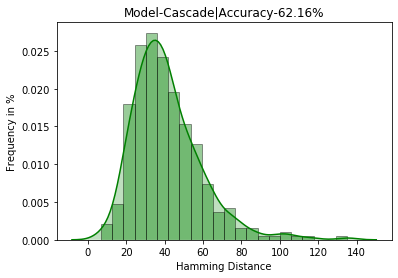

In [ ]:
sns.distplot(analytics['testList'], color="g", kde_kws={"shade": True}, kde=True, hist_kws={'edgecolor':'black'})
plt.title("Model-"+str(model_code)+"|Accuracy-"+str(100-test_geomean)+"%")
plt.xlabel('Hamming Distance')
plt.ylabel('Frequency in %')
plt.show()

Text(0, 0.5, 'Frequency in %')

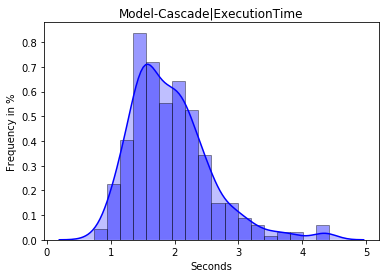

In [ ]:
sns.distplot(inferencetime, kde=True, 
             color = 'b',
             hist_kws={'edgecolor':'black'}, kde_kws={"shade": True})
# Add labels
#plt.title('Model-FineTuneALL_10_4_e10|ExecutionTime')
plt.title("Model-"+str(model_code)+"|ExecutionTime")
plt.xlabel('Seconds')
plt.ylabel('Frequency in %')

Text(0, 0.5, 'Frequency in %')

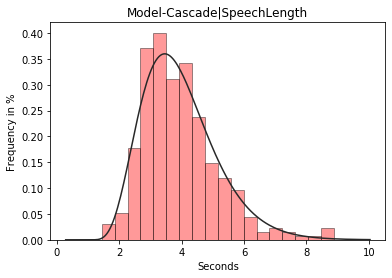

In [ ]:
sns.distplot(audiolength, hist=True, kde=False, fit=stats.gamma,
             color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
#plt.title('Model-FineTuneALL_10_4_e10|SpeechLength')
plt.title("Model-"+str(model_code)+"|SpeechLength")
plt.xlabel('Seconds')
plt.ylabel('Frequency in %')
